In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_autos = pd.read_csv('./autos.csv')

In [3]:
df_autos.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
df_autos["vehicleType"] = df_autos["vehicleType"].astype('category')
df_autos["gearbox"] = df_autos["gearbox"].astype('category')
df_autos["fuelType"] = df_autos["fuelType"].astype('category')
df_autos["brand"] = df_autos["brand"].astype('category')
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   index                371528 non-null  int64   
 1   dateCrawled          371528 non-null  object  
 2   name                 371528 non-null  object  
 3   seller               371528 non-null  object  
 4   offerType            371528 non-null  object  
 5   price                371528 non-null  int64   
 6   abtest               371528 non-null  object  
 7   vehicleType          333659 non-null  category
 8   yearOfRegistration   371528 non-null  int64   
 9   gearbox              351319 non-null  category
 10  powerPS              371528 non-null  int64   
 11  model                351044 non-null  object  
 12  kilometer            371528 non-null  int64   
 13  monthOfRegistration  371528 non-null  int64   
 14  fuelType             338142 non-null  category
 15  

In [6]:
df_autos.abtest
df_autos.iloc[(df_autos.price.idxmax())]

index                                   129969
dateCrawled                2016-03-11 08:37:57
name                   Kaufe_AUTOS_Zum_basteln
seller                                  privat
offerType                              Angebot
price                               2147483647
abtest                                    test
vehicleType                             andere
yearOfRegistration                        1996
gearbox                                manuell
powerPS                                    888
model                                      NaN
kilometer                               150000
monthOfRegistration                          1
fuelType                                andere
brand                           sonstige_autos
notRepairedDamage                           ja
dateCreated                2016-03-11 00:00:00
nrOfPictures                                 0
postalCode                                4720
lastSeen                   2016-03-20 11:45:35
Name: 129969,

/home/rolo/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/tmp/ipykernel_9929/2772423308.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)


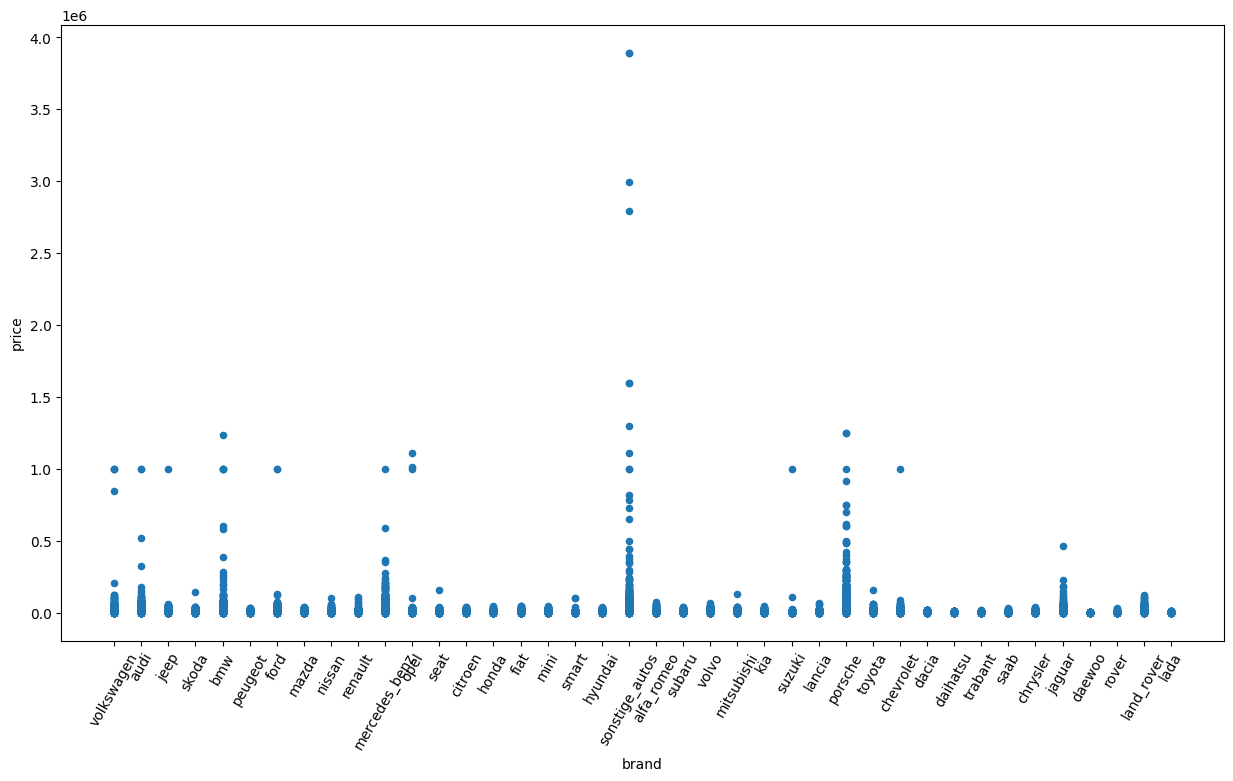

In [25]:
df_price_z_scores = stats.zscore(df_autos['price'])
df_filtered = df_autos[np.absolute(df_price_z_scores) <= 2 ]
ax = df_filtered.plot.scatter(x='brand', y='price', figsize=(15, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
ax.set_yticklabels()
plt.show()